# Computer Problem Set 3 : Stochastic integration

## Imane Farhat

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps

### Question 1
Let's first write a function that returns $m$ samples of a Brownian motion.

In [21]:
T=2

def brownian_motion(n,m):
    
    dT=T/n
    Z=np.random.randn(m, n)*np.sqrt(dT)
    
    return np.concatenate((np.zeros([m,1]) , np.cumsum(Z, axis=1)), axis=1)

We consider a brownian motion W, and we denote $\Delta W_{t_i^n} = W_{t_i^n}-W_{t_{i-1}^n}$ with $t_i^n = i \Delta T$ for $i=0,...,n$ and $\Delta T =\frac{T}{n}$.
We define :
$$ I_n = \sum_{i=1}^{n} W_{t_{i-1}^n} \Delta W_{t_i^n} $$

$$ J_n = \sum_{i=1}^{n} W_{t_{i}^n} \Delta W_{t_i^n} $$

$$ K_n = \sum_{i=1}^{n} \frac{ W_{t_{i-1}^n} + W_{t_{i-1}^n}}{2} \Delta W_{t_i^n} $$

Let's draw $N=1000$ copies of the random variables $\frac{1}{2} W_T^2 - I_n $, $\frac{1}{2} W_T^2 - J_n$ and $\frac{1}{2} W_T^2 - K_n$.

In [33]:
N=1000
n=100

def compute_IJK(n,N):
    W=brownian_motion(n,N)
    WT=W[:,-1]

    DW=np.diff(W, axis=1)

    I=np.sum(DW*W[:,:-1], axis=1)
    J=np.sum(DW*W[:,1:], axis=1)
    K=np.sum(DW*(W[:,:-1]+W[:,1:])/2, axis=1)
    
    V1=0.5*WT**2-I
    V2=0.5*WT**2-J
    V3=0.5*WT**2-K
    
    return V1,V2,V3

V1,V2,V3= compute_IJK(n,N)

Sample means of variables $\frac{1}{2} W_T^2 - I_n $, $\frac{1}{2} W_T^2 - J_n$ and $\frac{1}{2} W_T^2 - K_n$ :

In [43]:
print("The sample mean of the first variable is : %0.4f" %np.mean(V1))
print("The sample mean of the second variable is : %0.4f" %np.mean(V2))
print("The sample mean of the third variable is : %0.4f" %np.mean(V3))

The sample mean of the first variable is : 1.0095
The sample mean of the second variable is : -1.0095
The sample mean of the third variable is : -0.0000


All three variables $I_n, J_n$ and $K_n$ can be seen as different Reimann series candidates to define the stochastic integral :
$$\int_{0}^{T} W_s dW_s$$

We can verify that :
$$E(I_n)=0$$
$$E(J_n)=T$$
$$E(K_n)=\frac{T}{2}$$
Thus :
$$E(\frac{1}{2} W_T^2 - I_n) = \frac{1}{2} E(W_T^2) = \frac{T}{2} = 1 $$
$$ E(\frac{1}{2} W_T^2 - J_n) = \frac{1}{2} E(W_T^2) - T = \frac{T}{2} - T = -\frac{T}{2} = -1$$
$$E(\frac{1}{2} W_T^2 - K_n) = \frac{1}{2} E(W_T^2) - \frac{T}{2} = \frac{T}{2} - \frac{T}{2} =0$$

These results are well confirmed by the simulation above.
This shows that these three quantities have completely different means, and thus cannot converge to the same limit (which is supposed to be the stochastic integral $\int_{0}^{T} W_s dW_s$).

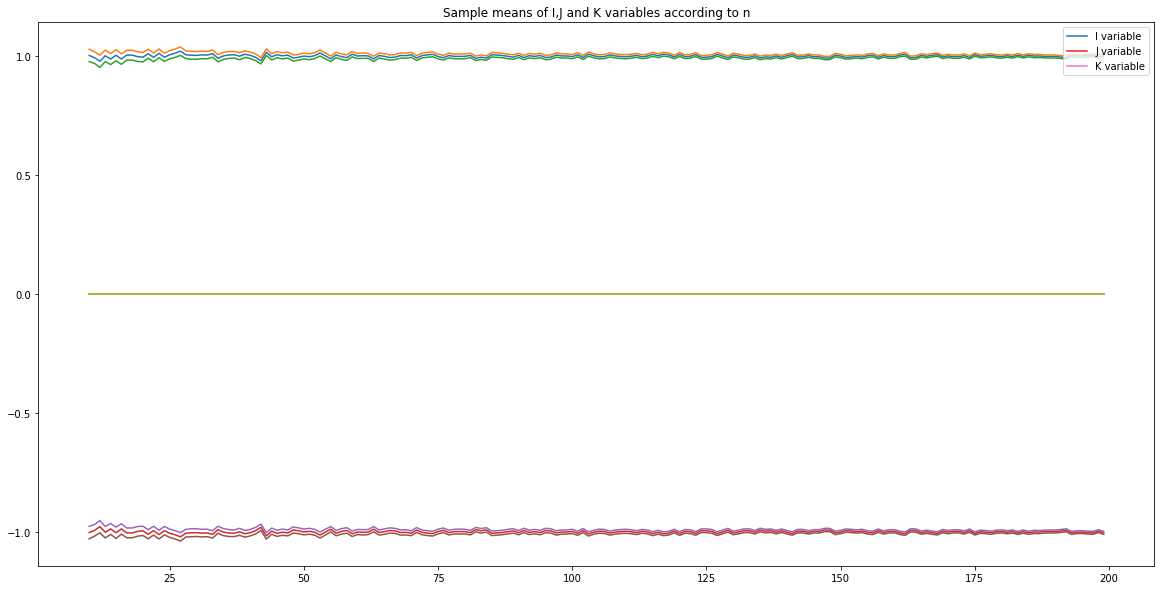

In [68]:
V1s=[]
V2s=[]
V3s=[]

stds1=[]
stds2=[]
stds3=[]

for n in range(10,200):
    i,j,k=compute_IJK(n,N)
    V1s.append(np.mean(i))
    V2s.append(np.mean(j))
    V3s.append(np.mean(k))
    
    stds1.append(np.std(i))
    stds2.append(np.std(j))
    stds3.append(np.std(k))
    
alpha = 0.05
q = sps.norm.ppf(1-alpha/2, loc=0, scale=1)

Confidence_Interval_I = q*np.array(stds1)/np.sqrt(N)
Confidence_Interval_J = q*np.array(stds2)/np.sqrt(N)
Confidence_Interval_K = q*np.array(stds3)/np.sqrt(N)

plt.figure(figsize=(20,10))

plt.plot(range(10,200), V1s, label="I variable")
plt.plot(range(10,200), V1s+Confidence_Interval_I)
plt.plot(range(10,200), V1s-Confidence_Interval_I)

plt.plot(range(10,200), V2s, label='J variable')
plt.plot(range(10,200), V2s+Confidence_Interval_J)
plt.plot(range(10,200), V2s-Confidence_Interval_J)

plt.plot(range(10,200), V3s, label="K variable")
plt.plot(range(10,200), V3s+Confidence_Interval_K)
plt.plot(range(10,200), V3s-Confidence_Interval_K)

plt.title("Sample means of I,J and K variables according to n")
plt.legend()
plt.show()

### Question 2

Let's define 3 different variables :

$$ A_n = \sum_{i=1}^{n} \exp{(t_{i-1}^n)} \Delta W_{t_i^n} $$

$$ B_n = \sum_{i=1}^{n} \exp{(t_{i}^n)} \Delta W_{t_i^n} $$

$$ C_n = \sum_{i=1}^{n} \exp{(\frac{ t_{i-1}^n + t_{i-1}^n}{2})} \Delta W_{t_i^n} $$

Let's draw again $N=1000$ copies of the variables $\frac{1}{2} W_T^2 - A_n $, $\frac{1}{2} W_T^2 - B_n$ and $\frac{1}{2} W_T^2 - C_n$.

In [80]:
def compute_ABC(n,N):
    W=brownian_motion(n,N)
    WT=W[:,-1]
    
    dT=T/n
    ts=np.array([0]+list(range(n)))*dT

    DW=np.diff(W, axis=1)

    A=np.sum(DW*np.exp(ts[:-1]), axis=1)
    B=np.sum(DW*np.exp(ts[1:]), axis=1)
    C=np.sum(DW*np.exp((ts[:-1]+ts[1:])/2), axis=1)
    
    V1=0.5*WT**2-A
    V2=0.5*WT**2-B
    V3=0.5*WT**2-C
    
    return V1,V2,V3

V1,V2,V3= compute_ABC(n,N)

Sample means of the variables $\frac{1}{2} W_T^2 - A_n $, $\frac{1}{2} W_T^2 - B_n$ and $\frac{1}{2} W_T^2 - C_n$ : 

In [81]:
print("The sample mean of the first variable is : %0.4f" %np.mean(V1))
print("The sample mean of the second variable is : %0.4f" %np.mean(V2))
print("The sample mean of the third variable is : %0.4f" %np.mean(V3))

The sample mean of the first variable is : 0.9213
The sample mean of the second variable is : 0.9205
The sample mean of the third variable is : 0.9209


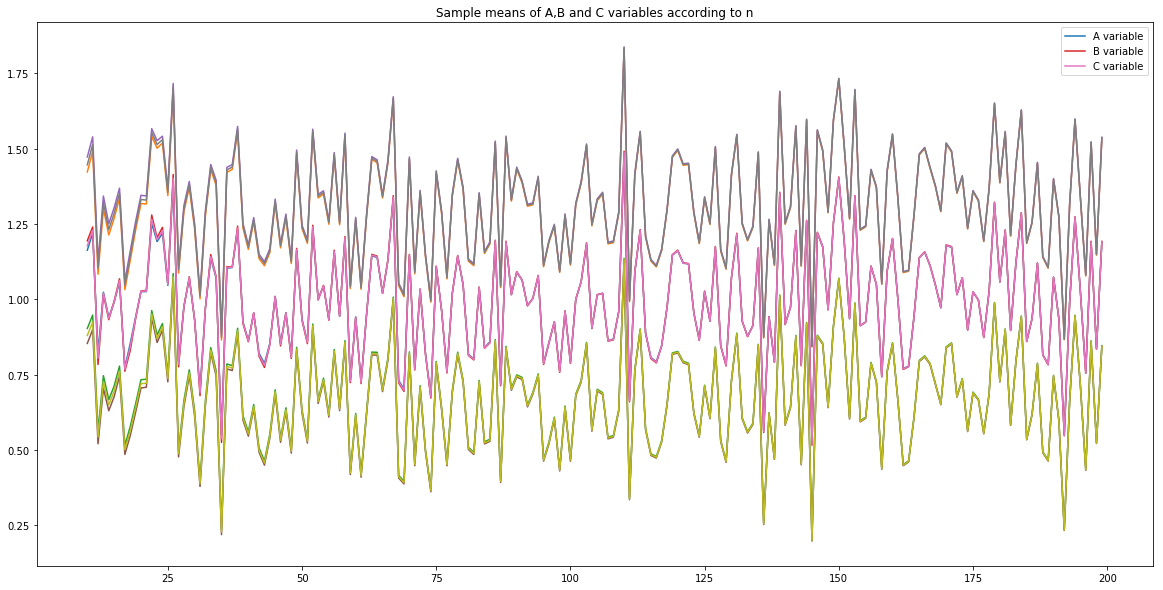

In [82]:
V1s=[]
V2s=[]
V3s=[]

stds1=[]
stds2=[]
stds3=[]

for n in range(10,200):
    a,b,c=compute_ABC(n,N)
    V1s.append(np.mean(a))
    V2s.append(np.mean(b))
    V3s.append(np.mean(c))
    
    stds1.append(np.std(a))
    stds2.append(np.std(b))
    stds3.append(np.std(c))
    
Confidence_Interval_A = q*np.array(stds1)/np.sqrt(N)
Confidence_Interval_B = q*np.array(stds2)/np.sqrt(N)
Confidence_Interval_C = q*np.array(stds3)/np.sqrt(N)

plt.figure(figsize=(20,10))
plt.plot(range(10,200), V1s, label="A variable")
plt.plot(range(10,200), V1s+Confidence_Interval_A)
plt.plot(range(10,200), V1s-Confidence_Interval_A)

plt.plot(range(10,200), V2s, label='B variable')
plt.plot(range(10,200), V1s+Confidence_Interval_B)
plt.plot(range(10,200), V1s-Confidence_Interval_B)

plt.plot(range(10,200), V3s, label="C variable")
plt.plot(range(10,200), V1s+Confidence_Interval_C)
plt.plot(range(10,200), V1s-Confidence_Interval_C)

plt.title("Sample means of A,B and C variables according to n")
plt.legend()
plt.show()

The variables $A_n, B_n$ and $C_n$ can be interpreted as the Riemann series of the stochastic integral :
$$\int_{0}^{T} exp(s) dW_s$$

The difference between this integral and the one of the previous question is that the three series $A_n, B_n$ and $C_n$ converge to the same limit. This is due to the fact that the function integrated in this case (exp) is deterministic and therefore $F_t$-mesurable for every $t\geq0$. Therefore the choice of the time $t_i$ or $t_{i-1}$ does not have much effect.

### Question 3

Let's define the random variables :
$$ A_n = sin(W_T) + \frac{1}{2n} \sum_{i=1}^{n} sin(W_{t_{i-1}^n}) $$

In [54]:
M=1000

def compute_A(n,M):

    W=brownian_motion(n,M)
    WT=W[:,-1]

    A=0.5* np.sum(np.sin(W[:,:-1]), axis=1)/n + np.sin(WT)
    
    return A

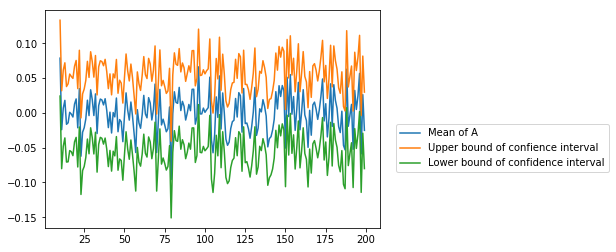

In [97]:
mean_A=[]
stds_A=[]
for n in range(10,200):
    sample=compute_A(n,M)
    mean_A.append(np.mean(sample))
    stds_A.append(np.std(sample))

Confidence_Interval = q*np.array(stds_A)/np.sqrt(M)

plt.plot(range(10,200), mean_A, label="Mean of A")
plt.plot(range(10,200), mean_A+Confidence_Interval, label="Upper bound of confience interval")
plt.plot(range(10,200), mean_A-Confidence_Interval, label="Lower bound of confidence interval")

plt.legend(loc='best', bbox_to_anchor=(1.7, 0.5))
plt.show()

The mean of the variable A is 0 because its distribution is symmetric with respect to 0.
The confidence intervalles however do not change with respect to n.